In [1]:
import pandas as pd
import numpy as np
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt 

In [2]:
startup=pd.read_csv("C:/Users/1234/Downloads/50_Startups.csv")

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# Check for missing value
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


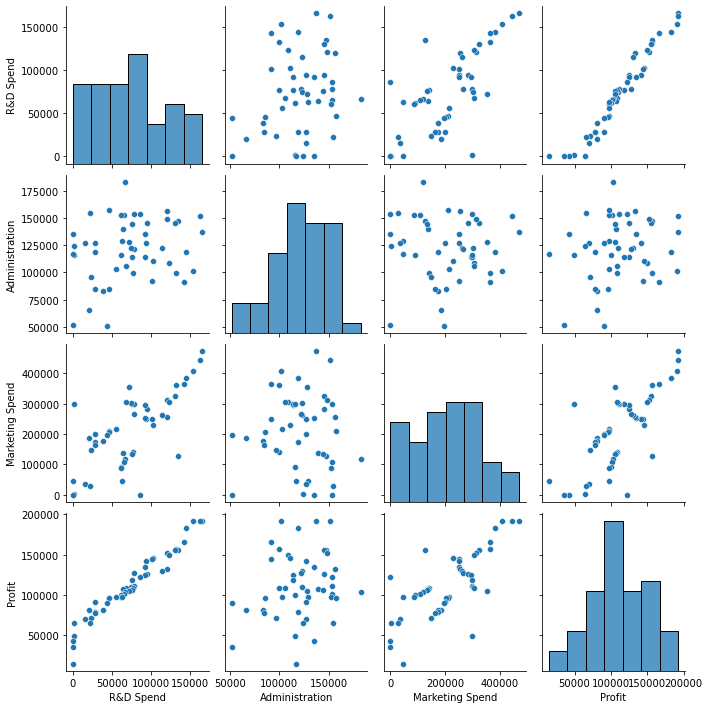

In [8]:
import seaborn as sns
sns.pairplot(startup)

In [9]:
startup=startup.rename({"R&D Spend":"RD","Marketing Spend":"MS"},axis=1)

In [10]:
import statsmodels.formula.api as smf

In [11]:
model=smf.ols("Profit~RD+Administration+MS",data=startup).fit()

In [12]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [13]:
print(model.tvalues,'\n',model.pvalues)

Intercept          7.626218
RD                17.846374
Administration    -0.525507
MS                 1.655077
dtype: float64 
 Intercept         1.057379e-09
RD                2.634968e-22
Administration    6.017551e-01
MS                1.047168e-01
dtype: float64


In [14]:
# To find Multicollanearity
# Simple Linear Regression Models
model_RD=smf.ols("Profit~RD",data=startup).fit()

In [15]:
(model_RD.tvalues,model_RD.pvalues)

(Intercept    19.320288
 RD           29.151139
 dtype: float64,
 Intercept    2.782697e-24
 RD           3.500322e-32
 dtype: float64)

In [16]:
model_Admin=smf.ols("Profit~Administration",data=startup).fit()

In [17]:
(model_Admin.tvalues,model_Admin.pvalues)

(Intercept         3.040044
 Administration    1.419493
 dtype: float64,
 Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [18]:
model_Mark=smf.ols("Profit~MS",data=startup).fit()

In [19]:
(model_Mark.tvalues,model_Mark.pvalues)

(Intercept    7.808356
 MS           7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [20]:
model_AM=smf.ols("Profit~Administration+MS",data=startup).fit() 

In [21]:
(model_AM.tvalues,model_AM.pvalues)

(Intercept         1.142741
 Administration    2.467779
 MS                8.281039
 dtype: float64,
 Intercept         2.589341e-01
 Administration    1.729198e-02
 MS                9.727245e-11
 dtype: float64)

In [22]:
model_RM=smf.ols("Profit~RD+MS",data=startup).fit()

In [23]:
(model_RM.tvalues,model_RM.pvalues)

(Intercept    17.463582
 RD           19.265555
 MS            1.927052
 dtype: float64,
 Intercept    3.504062e-22
 RD           6.040433e-24
 MS           6.003040e-02
 dtype: float64)

In [24]:
model_RA=smf.ols("Profit~RD+Administration",data=startup).fit()

In [25]:
model_RA.pvalues

Intercept         5.695336e-12
RD                2.278348e-31
Administration    2.888932e-01
dtype: float64

In [26]:
#calculating VIF
ml_RD=smf.ols("RD~Administration+MS",data=startup).fit()
rsq_RD=ml_RD.rsquared
vif_RD=1/(1-rsq_RD)
vif_RD

2.4689030699947017

In [27]:
ml_Admin=smf.ols("Administration~RD+MS",data=startup).fit()
rsq_Admin=ml_Admin.rsquared
vif_Admin=1/(1-rsq_Admin)
vif_Admin

1.1750910070550458

In [28]:
ml_MS=smf.ols("MS~Administration+RD",data=startup).fit()
rsq_MS=ml_MS.rsquared
vif_MS=1/(1-rsq_MS)
vif_MS

2.3267732905308773

In [29]:
# Storing VIF value in table
d1={"Variable":["R&D","Administration","Marketing Spend"],"VIF":[vif_RD,vif_Admin,vif_MS]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variable,VIF
0,R&D,2.468903
1,Administration,1.175091
2,Marketing Spend,2.326773


#### Inference:
From the above vif value, there is no any multicollinarity problem.

## Model validation Technique

### Residual Analysis

#### Test for normality of residual (Q-Q plot)

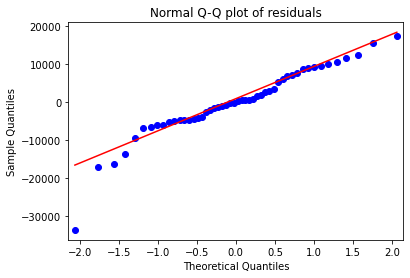

In [30]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

#### Inference:
Residuals are normally distributed

In [31]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

#### Residual plot for Homoscedasticity

In [32]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

In [33]:
get_standardized_values(model.fittedvalues).shape

(50,)

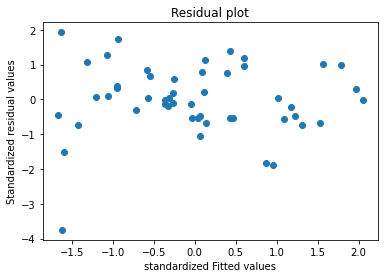

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### Inference:
As there is no pattern,model is good.

### Residual Vs Regressor

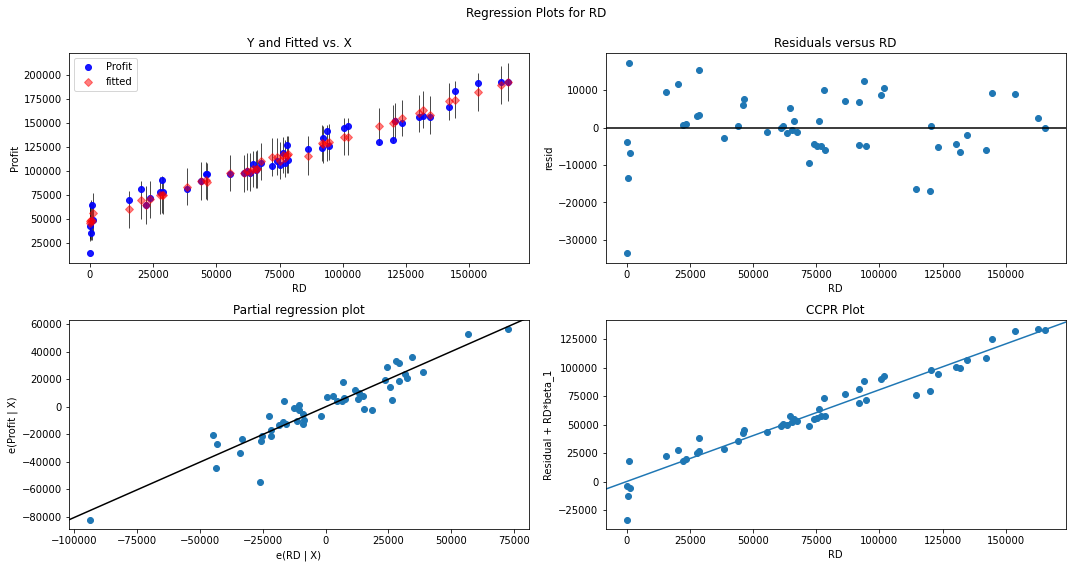

In [35]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RD",fig=fig)
plt.show()

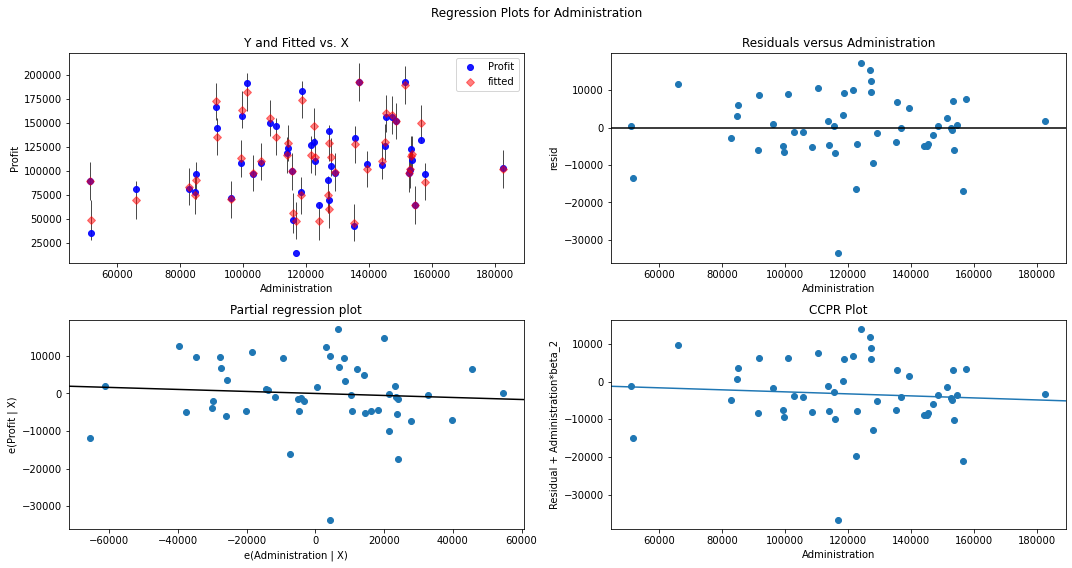

In [36]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"Administration",fig=fig)
plt.show()

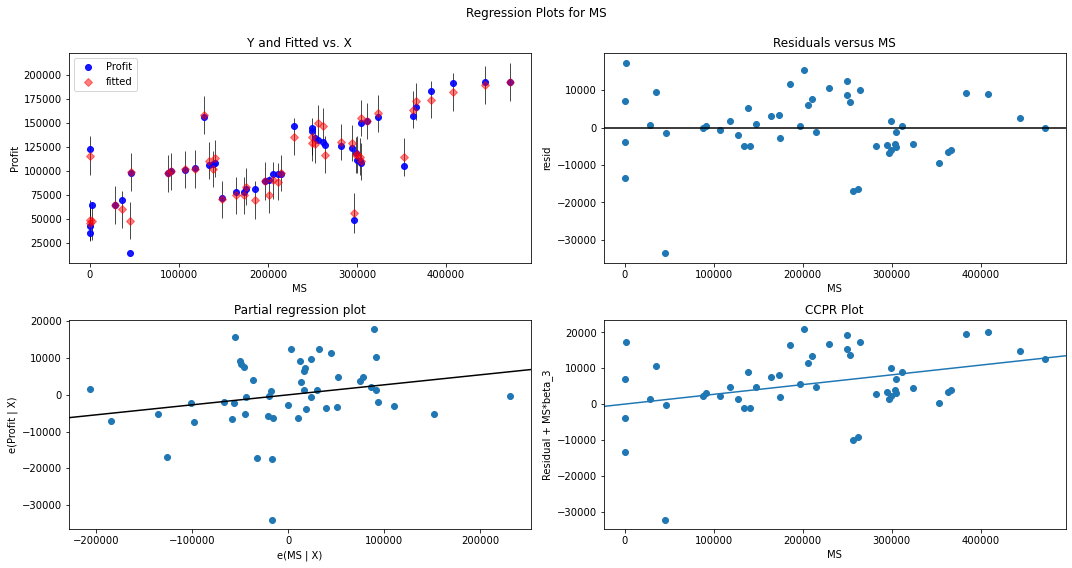

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MS",fig=fig)
plt.show()

#### Inference:
All variables are significant

# Model Detection Diagnostics

#### Detecting Influencers/Outliers

In [38]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

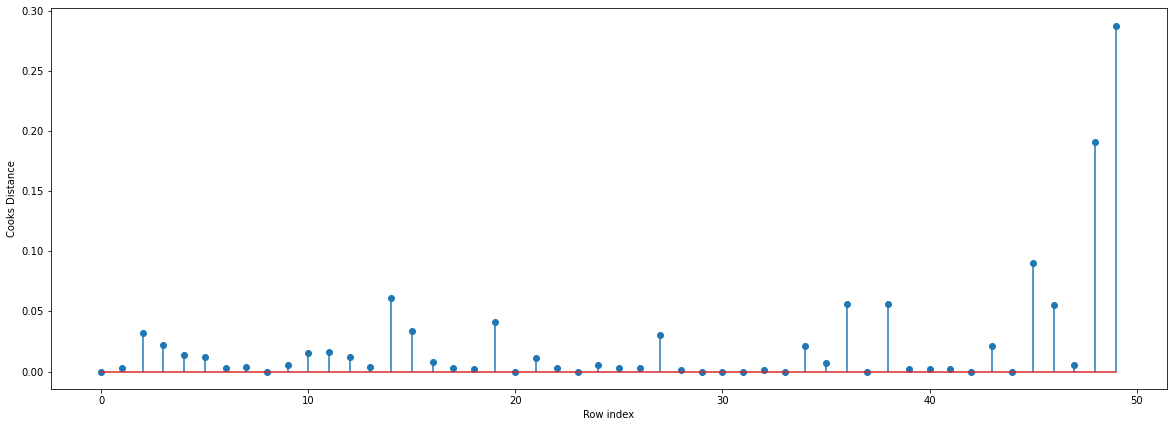

In [39]:
#Plot the influencers values using stem plot
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [40]:
#index and value of influencer where c is more than .5
(np.argmax(c))

49

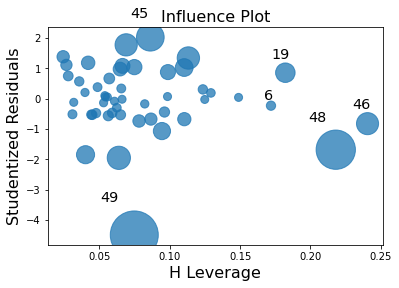

In [41]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [42]:
k=startup.shape[1]
n=startup.shape[0]
leverage_cutoff=3*((k+1)/n)

In [43]:
leverage_cutoff

0.36

In [44]:
startup.shape

(50, 5)

#### From the above plot,it is evident that data point 49 is the influencers

In [45]:
startup[startup.index.isin([49])]

,RD,Administration,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [46]:
startup.head()

,RD,Administration,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Improving the model

In [47]:
startup_new=pd.read_csv("C:/Users/1234/Downloads/50_Startups.csv")

In [48]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup1=startup_new.drop(startup_new.index[[49]],axis=0).reset_index()

In [49]:
#Drop the original index
startup1=startup1.drop(['index'],axis=1)

In [50]:
startup1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [51]:
startup1=startup1.rename({"R&D Spend":"RD","Marketing Spend":"MS"},axis=1)

In [52]:
model1=smf.ols("Profit~RD+Administration+MS",data=startup1).fit()

In [53]:
(model1.rsquared,model1.rsquared_adj)

(0.9613162435129847, 0.9587373264138503)

In [54]:
model_influence_V=model1.get_influence()
(c_V,_)=model_influence_V.cooks_distance

<StemContainer object of 3 artists>

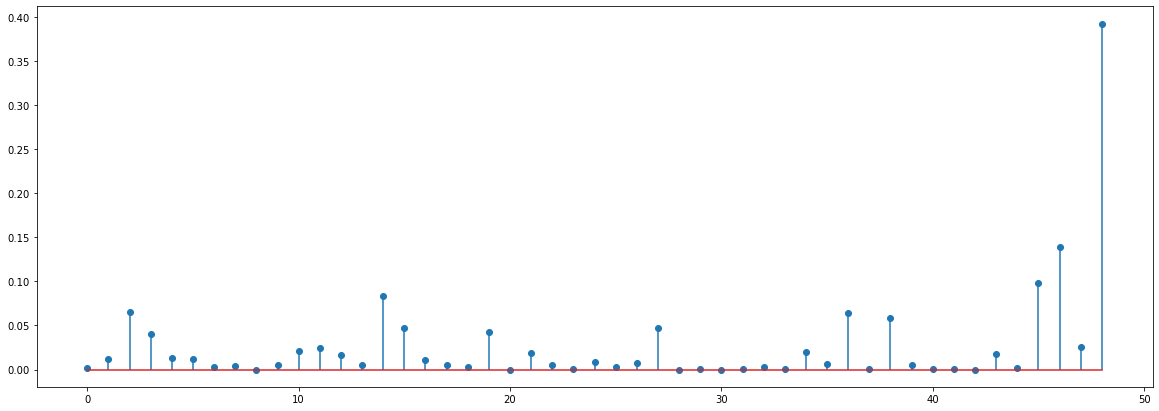

In [55]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup1)),np.round(c_V,3))

In [56]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup2=startup1.drop(startup_new.index[[48]],axis=0).reset_index()

In [57]:
startup2=startup2.drop(['index'],axis=1)

In [58]:
model2=smf.ols("Profit~RD+Administration+MS",data=startup2).fit()

In [59]:
(model2.rsquared,model2.rsquared_adj)

(0.9626766170294073, 0.960131840917776)

In [61]:
y_pred=model2.predict(startup)

In [62]:
d1={"Profit":startup["Profit"],"Profit_pred":y_pred}

In [63]:
Profit=pd.DataFrame(d1)

In [64]:
Profit

,Profit,Profit_pred
0,192261.83,188939.277484
1,191792.06,185378.579127
2,191050.39,180724.354190
3,182901.99,172036.176973
4,166187.94,171688.341312
5,156991.12,163022.000480
6,156122.51,158209.614122
7,155752.60,158220.907984
8,152211.77,150109.699290
9,149759.96,154738.693091
